# Tugas UTS

In [31]:
import pandas as pd
import math
import numpy as np

In [32]:
dataset_url="https://raw.githubusercontent.com/ABDHanifAzhari/dataset/main/dataR2.csv"
data_uts = pd.read_csv(dataset_url)

In [33]:
data_uts

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [34]:
data_uts.shape

(116, 10)

membagi antara data input dan data klasifikasi

In [35]:
X = data_uts.drop(columns=["Classification"]).values
y = data_uts.Classification

melakukan spliting dataset dengan data latih dan data uji

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((92, 9), (24, 9), (92,), (24,))

Melakukan Scaling agar jarak data dapat di prediksi dengan baik

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Naive Bayes

In [39]:
# Memisahkan dataset dalam variabel independen dan dependen
X = data_uts.iloc[:,:4].values
y = data_uts['Classification'].values

In [40]:
# Memisahkan dataset menjadi Training set dan Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [41]:
# Fitur Scaling untuk membawa variabel dalam satu skala
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
# Memasang Klasifikasi Naive Bayes ke set Pelatihan dengan kernel linier
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [43]:
# Memprediksi hasil set Tes
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2]


In [44]:
# melihat nilai aktual dan prediksi berdampingan
y_compare = np.vstack((y_test,y_pred)).T
# nilai aktual di sisi kiri dan nilai prediksi di sisi kanan
# mencetak 5 nilai teratas
y_compare[:5,:]

array([[2, 1],
       [1, 1],
       [2, 1],
       [2, 1],
       [1, 1]])

In [45]:
# Membuat Matriks confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  1]
 [ 9  4]]


In [46]:
# menemukan akurasi dari matriks confusion
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))      

Correct predictions:  14
False predictions 10


Accuracy of the Naive Bayes Clasification is:  0.5833333333333334


## Decision Tree

Membuat klasifikasi decision tree

In [47]:
from sklearn import tree
from matplotlib import pyplot as plt
# Create DecisionTree Classifier
clf_tree = tree.DecisionTreeClassifier(criterion="entropy")
clf_tree = clf_tree.fit(X_train_scaled, y_train)

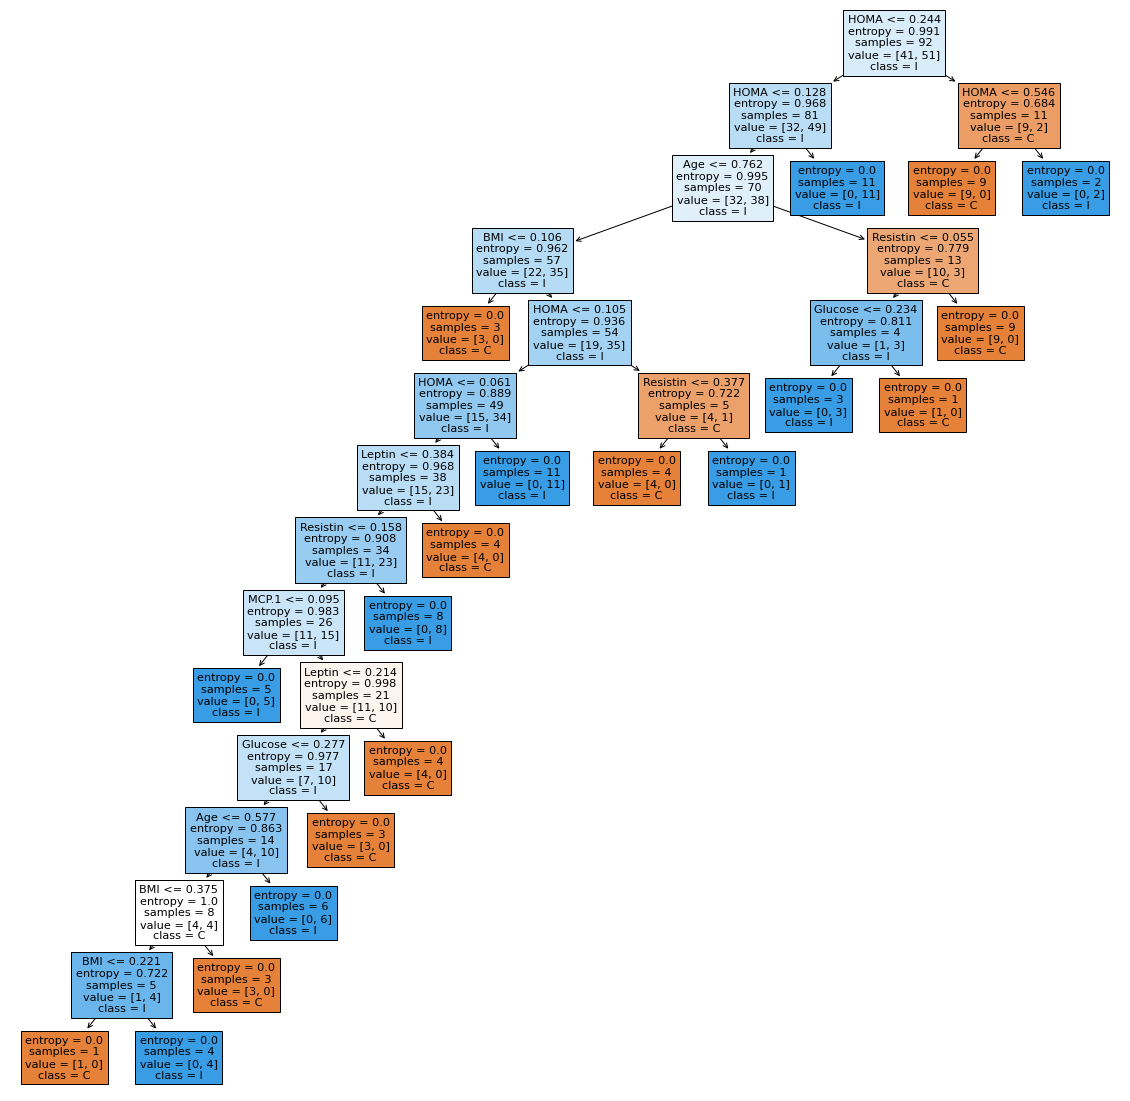

In [48]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf_tree, feature_names=list(data_uts.columns.values)[:9], class_names=list(data_uts.columns.values)[9] ,filled=True)

In [49]:
print("Score data latih :", clf_tree.score(X_train_scaled, y_train))
print("Score data uji   :", clf_tree.score(X_test_scaled, y_test))

Score data latih : 1.0
Score data uji   : 0.6666666666666666
